# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import newsapi
from newsapi.newsapi_client import NewsApiClient

%matplotlib inline
load_dotenv()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\thejp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
# Read your api key environment variable
load_dotenv()
 

True

In [3]:
api_key = os.getenv("NEWS_API")


In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)


In [5]:
# Fetch the Bitcoin news articles
Bitcoin = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [6]:
Bitcoin["articles"][0]


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Jon Fingas',
 'title': 'AMC theaters will accept cryptocurrencies beyond Bitcoin',
 'description': "You won't have to stick to Bitcoin if you're determined to pay for your movie ticket with cryptocurrency. AMC chief Adam Aron has revealed his theater chain will also accept Ethereum, Litecoin and Bitcoin Cash when crypto payments are available. He didn't hav…",
 'url': 'https://www.engadget.com/amc-theaters-accept-ethereum-litecoin-bitcoin-cash-132642183.html',
 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-09/4a01cb80-16eb-11ec-abfe-c7b840dd48ca',
 'publishedAt': '2021-09-16T13:26:42Z',
 'content': "You won't have to stick to Bitcoin if you're determined to pay for your movie ticket with cryptocurrency. AMC chief Adam Aron has revealed his theater chain will also accept Ethereum, Litecoin and Bi… [+1198 chars]"}

In [7]:
# Fetch the Ethereum news articles
Ethereum = newsapi.get_everything(
    q="Ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [8]:
Ethereum["articles"][0]


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Kim Lyons',
 'title': 'China’s central bank bans cryptocurrency transactions to avoid ‘risks’',
 'description': 'China’s central bank on Friday said cryptocurrency transactions in the country are illegal, banning all transactions. It said cryptocurrencies like bitcoin and Ethereum are not legal tender and can’t be circulated.',
 'url': 'https://www.theverge.com/2021/9/24/22691472/china-central-bank-cryptocurrency-illegal-bitcoin',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/mde_l3lUC4muDPEFG7LYrUz0O3g=/0x146:2040x1214/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/8921023/acastro_bitcoin_2.jpg',
 'publishedAt': '2021-09-24T16:22:55Z',
 'content': 'Its the countrys latest crackdown on digital currencies\r\nIllustration by Alex Castro / The Verge\r\nThe Peoples Bank of China, the countrys central bank, said Friday that cryptocurrency transactions ar… [+1461 chars]'}

In [9]:
# Create the Bitcoin sentiment scores DataFrame
Bitcoin_sentiments = []

for article in Bitcoin["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

Bitcoin_df = pd.DataFrame(Bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
Bitcoin_df = Bitcoin_df[cols]

Bitcoin_df.head()    
    

,date,text,compound,positive,negative,neutral
0,2021-09-16,You won't have to stick to Bitcoin if you're d...,0.5574,0.127,0.036,0.838
1,2021-09-23,Four months after Twitter first introduced in-...,0.0000,0.000,0.000,1.000
2,2021-09-25,Bitcoin and similar blockchain-based cryptos e...,0.0000,0.000,0.000,1.000
3,2021-10-04,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,-0.2411,0.000,0.116,0.884
4,2021-09-28,Elon Musk has performed a sudden U-turn on bit...,0.1901,0.091,0.043,0.866


In [10]:
# Create the Ethereum sentiment scores DataFrame
Ethereum_sentiments = []

for article in Ethereum["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

Ethereum_df = pd.DataFrame(Bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
Ethereum_df = Ethereum_df[cols]

Ethereum_df.head()    

,date,text,compound,positive,negative,neutral
0,2021-09-16,You won't have to stick to Bitcoin if you're d...,0.5574,0.127,0.036,0.838
1,2021-09-23,Four months after Twitter first introduced in-...,0.0000,0.000,0.000,1.000
2,2021-09-25,Bitcoin and similar blockchain-based cryptos e...,0.0000,0.000,0.000,1.000
3,2021-10-04,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,-0.2411,0.000,0.116,0.884
4,2021-09-28,Elon Musk has performed a sudden U-turn on bit...,0.1901,0.091,0.043,0.866


In [11]:
# Describe the Bitcoin Sentiment
Bitcoin_df.describe

<bound method NDFrame.describe of           date                                               text  compound  \
0   2021-09-16  You won't have to stick to Bitcoin if you're d...    0.5574   
1   2021-09-23  Four months after Twitter first introduced in-...    0.0000   
2   2021-09-25  Bitcoin and similar blockchain-based cryptos e...    0.0000   
3   2021-10-04  JPMorgan CEO Jamie Dimon is still not a Bitcoi...   -0.2411   
4   2021-09-28  Elon Musk has performed a sudden U-turn on bit...    0.1901   
..         ...                                                ...       ...   
95  2021-09-21  Evergrande\r\nSTR/ Getty images\r\nBitcoin hov...   -0.3919   
96  2021-09-24  Last May, the Chinese governmentbanned the cou...    0.0000   
97  2021-09-10  The U.S. Securities and Exchange Commission (S...    0.0772   
98  2021-09-29  Jack Dorsey , CEO of Twitter, had already anno...    0.3182   
99  2021-09-15  Ruben Sprich/Reuters\r\nRay Dalio, founder of ...    0.5719   

    positive  neg

In [12]:
# Describe the Ethereum Sentiment
Ethereum_df.describe

<bound method NDFrame.describe of           date                                               text  compound  \
0   2021-09-16  You won't have to stick to Bitcoin if you're d...    0.5574   
1   2021-09-23  Four months after Twitter first introduced in-...    0.0000   
2   2021-09-25  Bitcoin and similar blockchain-based cryptos e...    0.0000   
3   2021-10-04  JPMorgan CEO Jamie Dimon is still not a Bitcoi...   -0.2411   
4   2021-09-28  Elon Musk has performed a sudden U-turn on bit...    0.1901   
..         ...                                                ...       ...   
95  2021-09-21  Evergrande\r\nSTR/ Getty images\r\nBitcoin hov...   -0.3919   
96  2021-09-24  Last May, the Chinese governmentbanned the cou...    0.0000   
97  2021-09-10  The U.S. Securities and Exchange Commission (S...    0.0772   
98  2021-09-29  Jack Dorsey , CEO of Twitter, had already anno...    0.3182   
99  2021-09-15  Ruben Sprich/Reuters\r\nRay Dalio, founder of ...    0.5719   

    positive  neg

### Questions:

Q: Which coin had the highest mean positive score?

A: ETH

Q: Which coin had the highest compound score?

A: BTC

Q. Which coin had the highest positive score?

A: ETH

ETH has highest mean. BTC has highest compound and posititve scores.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.corpus import reuters, stopwords
import re

# Code to download corpora
import nltk
nltk.download('wordnet')
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\thejp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\thejp\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thejp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thejp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer() 
# Create a list of stopwords
bitcoin_article = reuters.raw(fileids=reuters.fileids(categories='gas')[2])
def clean_text(bitcoin_article):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}
    
    re_clean = regex.sub('', bitcoin_article)
    words = word_tokenize(re_clean)
    output = [word.lower() for word in words if word.lower() not in sw.union(sw_addons)]
    return output

# Expand the default stopwords list if necessary


In [15]:
# Complete the tokenizer function
def process_text(bitcoin_article):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', bitcoin_article)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output
    
    # Remove the punctuation from text

   
    # Create a tokenized list of the words

    
    # Lemmatize words into root words

   
    # Convert the words to lowercase
    
    
    # Remove the stop words
    
    


In [16]:
# Create a new tokens column for Bitcoin
Bitcoin_df.append(Bitcoin, ignore_index=True)

,date,text,compound,positive,negative,neutral,articles,status,totalResults
0,2021-09-16,You won't have to stick to Bitcoin if you're d...,0.5574,0.127,0.036,0.838,NaN,NaN,NaN
1,2021-09-23,Four months after Twitter first introduced in-...,0.0000,0.000,0.000,1.000,NaN,NaN,NaN
2,2021-09-25,Bitcoin and similar blockchain-based cryptos e...,0.0000,0.000,0.000,1.000,NaN,NaN,NaN
3,2021-10-04,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,-0.2411,0.000,0.116,0.884,NaN,NaN,NaN
4,2021-09-28,Elon Musk has performed a sudden U-turn on bit...,0.1901,0.091,0.043,0.866,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
96,2021-09-24,"Last May, the Chinese governmentbanned the cou...",0.0000,0.000,0.000,1.000,NaN,NaN,NaN
97,2021-09-10,The U.S. Securities and Exchange Commission (S...,0.0772,0.063,0.054,0.883,NaN,NaN,NaN
98,2021-09-29,"Jack Dorsey , CEO of Twitter, had already anno...",0.3182,0.063,0.000,0.937,NaN,NaN,NaN
99,2021-09-15,"Ruben Sprich/Reuters\r\nRay Dalio, founder of ...",0.5719,0.110,0.000,0.890,NaN,NaN,NaN


In [17]:
# Create a new tokens column for Ethereum
Ethereum_df.append(Ethereum, ignore_index=True)

,date,text,compound,positive,negative,neutral,articles,status,totalResults
0,2021-09-16,You won't have to stick to Bitcoin if you're d...,0.5574,0.127,0.036,0.838,NaN,NaN,NaN
1,2021-09-23,Four months after Twitter first introduced in-...,0.0000,0.000,0.000,1.000,NaN,NaN,NaN
2,2021-09-25,Bitcoin and similar blockchain-based cryptos e...,0.0000,0.000,0.000,1.000,NaN,NaN,NaN
3,2021-10-04,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,-0.2411,0.000,0.116,0.884,NaN,NaN,NaN
4,2021-09-28,Elon Musk has performed a sudden U-turn on bit...,0.1901,0.091,0.043,0.866,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
96,2021-09-24,"Last May, the Chinese governmentbanned the cou...",0.0000,0.000,0.000,1.000,NaN,NaN,NaN
97,2021-09-10,The U.S. Securities and Exchange Commission (S...,0.0772,0.063,0.054,0.883,NaN,NaN,NaN
98,2021-09-29,"Jack Dorsey , CEO of Twitter, had already anno...",0.3182,0.063,0.000,0.937,NaN,NaN,NaN
99,2021-09-15,"Ruben Sprich/Reuters\r\nRay Dalio, founder of ...",0.5719,0.110,0.000,0.890,NaN,NaN,NaN


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from nltk.corpus import reuters, stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re


In [19]:
import nltk
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer() 

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\thejp\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thejp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thejp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\thejp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
ids = reuters.fileids(categories='gas')
corpus = [reuters.raw(i) for i in ids]

In [21]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

In [22]:
big_string = ' '.join(corpus)
input_words = process_text(big_string)

In [23]:
# Generate the Bitcoin N-grams where N=2
article = reuters.raw(reuters.fileids(categories='gas')[2])
print(article)

EIA SAYS DISTILLATE STOCKS UNCHANGED IN WEEK
  Distillate fuel stocks held in
  primary storage were unchanged in the week ended April three at
  106.9 mln barrels, the Energy Information Administration (EIA)
  said.
      In its weekly petroleum status report, the Department of
  Energy agency said gasoline stocks were off 200,000 barrels in
  the week to 248.1 mln barrels and refinery crude oil stocks
  rose 6.3 mln barrels to 335.8 mln.
      The EIA said residual fuel stocks fell 100,000 barrels to
  38.1 mln barrels and crude oil stocks in the Strategic
  Petroleum Reserve (SPR) rose 1.1 mln barrels to 520.0 mln.
      The total of all crude, refined product and SPR stocks rose
  9.4 mln barrels to 1,561.1, it said.
  




In [24]:
# Generate the Ethereum N-grams where N=2
article = reuters.raw(reuters.fileids(categories='gas')[2])
print(article)

EIA SAYS DISTILLATE STOCKS UNCHANGED IN WEEK
  Distillate fuel stocks held in
  primary storage were unchanged in the week ended April three at
  106.9 mln barrels, the Energy Information Administration (EIA)
  said.
      In its weekly petroleum status report, the Department of
  Energy agency said gasoline stocks were off 200,000 barrels in
  the week to 248.1 mln barrels and refinery crude oil stocks
  rose 6.3 mln barrels to 335.8 mln.
      The EIA said residual fuel stocks fell 100,000 barrels to
  38.1 mln barrels and crude oil stocks in the Strategic
  Petroleum Reserve (SPR) rose 1.1 mln barrels to 520.0 mln.
      The total of all crude, refined product and SPR stocks rose
  9.4 mln barrels to 1,561.1, it said.
  




In [25]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [26]:
# Use token_count to get the top 10 words for Bitcoin
Bitcoin_df.head(10)

,date,text,compound,positive,negative,neutral
0,2021-09-16,You won't have to stick to Bitcoin if you're d...,0.5574,0.127,0.036,0.838
1,2021-09-23,Four months after Twitter first introduced in-...,0.0000,0.000,0.000,1.000
2,2021-09-25,Bitcoin and similar blockchain-based cryptos e...,0.0000,0.000,0.000,1.000
3,2021-10-04,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,-0.2411,0.000,0.116,0.884
4,2021-09-28,Elon Musk has performed a sudden U-turn on bit...,0.1901,0.091,0.043,0.866
5,2021-09-07,A recently-installed Bitcoin ATM.\r\n\n \n\n A...,0.1779,0.052,0.000,0.948
6,2021-09-24,Its the countrys latest crackdown on digital c...,0.0000,0.000,0.000,1.000
7,2021-09-07,The government of El Salvador purchased at lea...,0.1280,0.046,0.000,0.954
8,2021-09-24,Twitter will now allow people to tip their fav...,0.5423,0.119,0.034,0.847
9,2021-09-16,"image captionProtesters held signs reading ""no...",-0.7096,0.040,0.195,0.765


In [27]:
# Use token_count to get the top 10 words for Ethereum
Ethereum_df.head(10)

,date,text,compound,positive,negative,neutral
0,2021-09-16,You won't have to stick to Bitcoin if you're d...,0.5574,0.127,0.036,0.838
1,2021-09-23,Four months after Twitter first introduced in-...,0.0000,0.000,0.000,1.000
2,2021-09-25,Bitcoin and similar blockchain-based cryptos e...,0.0000,0.000,0.000,1.000
3,2021-10-04,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,-0.2411,0.000,0.116,0.884
4,2021-09-28,Elon Musk has performed a sudden U-turn on bit...,0.1901,0.091,0.043,0.866
5,2021-09-07,A recently-installed Bitcoin ATM.\r\n\n \n\n A...,0.1779,0.052,0.000,0.948
6,2021-09-24,Its the countrys latest crackdown on digital c...,0.0000,0.000,0.000,1.000
7,2021-09-07,The government of El Salvador purchased at lea...,0.1280,0.046,0.000,0.954
8,2021-09-24,Twitter will now allow people to tip their fav...,0.5423,0.119,0.034,0.847
9,2021-09-16,"image captionProtesters held signs reading ""no...",-0.7096,0.040,0.195,0.765


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [42]:
 from nltk.corpus import stopwords, reuters
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt

# Code to download corpora
import nltk
nltk.download('wordnet')
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('punkt')


lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\thejp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\thejp\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thejp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thejp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [46]:
# Generate the Bitcoin word cloud
ids = reuters.fileids(categories='gold')
corpus = [reuters.raw(i) for i in ids]

My code does not like Bitcoin for some reason.

In [50]:
 def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

In [51]:
big_string = ' '.join(corpus)
input_text = process_text(big_string)

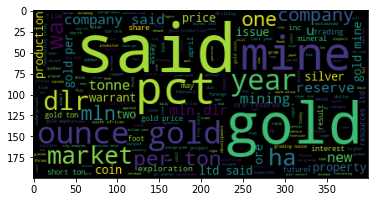

In [52]:
wc = WordCloud().generate(input_text)
plt.imshow(wc)

In [59]:
# Generate the Ethereum word cloud
ids = reuters.fileids(categories='silver')
corpus = [reuters.raw(i) for i in ids]

Again, I realize Ethereum is not working for some reason.

In [63]:
 def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

In [64]:
big_string = ' '.join(corpus)
input_text = process_text(big_string)

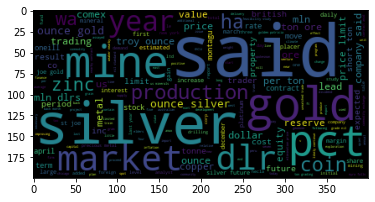

In [65]:
wc = WordCloud().generate(input_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [66]:
import spacy
from nltk.corpus import reuters
from spacy import displacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

In [67]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

---
### Bitcoin NER

In [72]:
# Concatenate all of the Bitcoin text together
article = reuters.raw(fileids = reuters.fileids(categories='gold')[0])

In [73]:
# Run the NER processor on all of the text
doc = nlp(article)

# Add a title to the document


In [74]:
# Render the visualization
displacy.render(doc, style='ent')

In [ ]:
# List all Entities


---

### Ethereum NER

In [76]:
# Concatenate all of the Ethereum text together
article = reuters.raw(fileids = reuters.fileids(categories='silver')[0])

In [78]:
# Run the NER processor on all of the text
doc = nlp(article)

# Add a title to the document


In [80]:
# Render the visualization
displacy.render(doc, style='ent') 

In [ ]:
# List all Entities


---